# Workflow in a nutshell
* Generate periodic time-series for training and test set
* Tune the hyperparameters of peak detector based on training set
* Test the found paramters w/ test set
* Generate a new kind of time-series, and apply previous peak detector directly
* Re-tune the peak detector

* Generate periodic time-series for training and test set


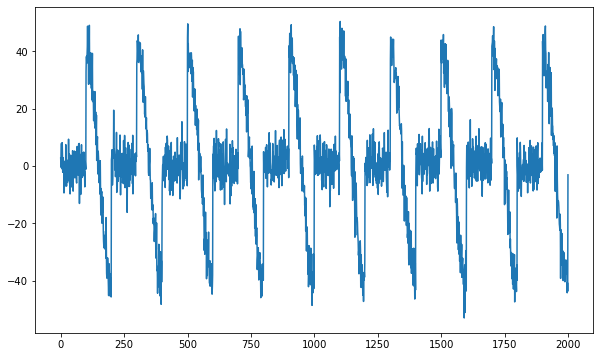

In [14]:
## Code comes from Coursera course: Sequences, Time Series and Prediction
import numpy as np
import matplotlib.pyplot as plt

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.5,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(10 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

def generate_data(peaks_number=10, baseline=0, period=200, amplitude=40, slope=0.0, noise_level=5, phase=100):
    time = np.arange(peaks_number * period + 1, dtype="float32")
    series = trend(time, slope)  

    # Create the series
    series = baseline + trend(time, slope) + seasonality(time, period=period, amplitude=amplitude, phase=phase)
    # Update with noise
    series += noise(time, noise_level, seed=42)
    return series

training_set = generate_data(peaks_number=10)
test_set = generate_data(peaks_number=20)

plt.figure(figsize=(10, 6))
plt.plot(training_set)
plt.show()

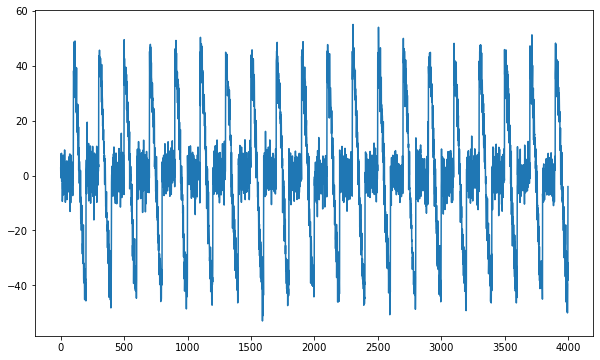

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(test_set)
plt.show()

## Dump the numpy array into csv


In [16]:
import pandas as pd
pd.DataFrame(training_set).to_csv("training_set1.csv", header=None)
pd.DataFrame(test_set).to_csv("test_set1.csv", header=None)


## Compile limbo 

In [17]:
#!bash compile_limbo.sh

## Run limbo to tune hyperparamters based on training_set1.csv

In [27]:
!bash run_training.sh

MoveCounter created!
lag = 114; threshold = 0.298802; influence = 0.762809
Finish reading data!
# of move detect = 10
Detected peaks = 10
MoveCounter detroyed!
MoveCounter created!
lag = 45; threshold = 0.848581; influence = 0.114848
Finish reading data!
# of move detect = 26
Detected peaks = 26
MoveCounter detroyed!
MoveCounter created!
lag = 86; threshold = 3.99224; influence = 0.651693
Finish reading data!
# of move detect = 0
Detected peaks = 0
MoveCounter detroyed!
MoveCounter created!
lag = 52; threshold = 4.43639; influence = 0.724634
Finish reading data!
# of move detect = 0
Detected peaks = 0
MoveCounter detroyed!
MoveCounter created!
lag = 88; threshold = 0.680795; influence = 0.539588
Finish reading data!
# of move detect = 12
Detected peaks = 12
MoveCounter detroyed!
MoveCounter created!
lag = 101; threshold = 2.26752; influence = 0.423365
Finish reading data!
# of move detect = 1
Detected peaks = 1
MoveCounter detroyed!
MoveCounter created!
lag = 118; threshold = 4.14887; 

## Test the found paramters on test set1

In [28]:
!bash run_test.sh

s1 = ../found_params.txt
MoveCounter created!
s2 = ../../../../test_set1.csv
Finish reading data!
# of move detect = 20
MoveCounter detroyed!


## Generate a new kind of periodic time series

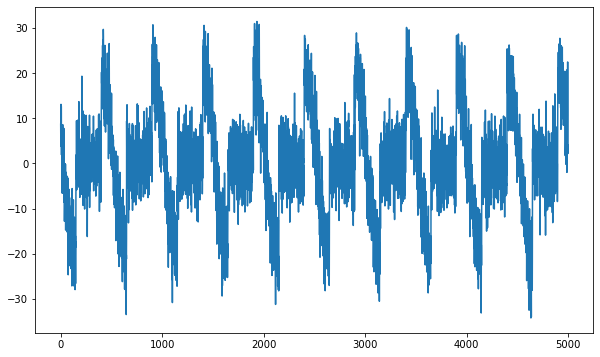

In [23]:
test_set2 = generate_data(peaks_number=10, period=500, amplitude=20)
plt.figure(figsize=(10, 6))
plt.plot(test_set2)
plt.show()

In [24]:
pd.DataFrame(test_set2).to_csv("test_set2.csv", header=None)


## Test the found paramters on test set2

In [29]:
!bash run_test2.sh

s1 = ../found_params.txt
MoveCounter created!
s2 = ../../../../test_set2.csv
Finish reading data!
# of move detect = 51
MoveCounter detroyed!
